<a href="https://colab.research.google.com/github/mizzony/ML-class/blob/main/230147_Sutinan_Logistic_Regression_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Analysis

In this portfolio using Diabetes dataset to predict out come (0 = no diabetes, 1= people who diagnosed with diabetes) and use and extensive of Data exploratory technique such as basic describe method .describe() and data visualization from Matplotlib library and Seaborn to draw some scatter plot, Regession line usin regplot. Visualize correlation matrix using .corr

Most importantly I use logit from statsmodels.api instead of OLS because I want to predict binary classification prredicter and receive evaluation score like accuracy, P-value but as we all know that accuracy alone might not be enough to evaluate the performance of the model so after performing cross validation. The reason why we perform cross Validation is to help better use of available data by ensuring all data points contribute to both training and testing and provides more reliable performance estimates, avoiding bias from a single train-test split. Here is the summary of the results I recieved

Cross-validated accuracy: 0.7709, means that the logistic regression model, when evaluated using 5-fold cross-validation, correctly predicted whether someone has diabetes (based on the features) around 77.1% of the time on average.
Cross-validated precision: 0.5720517872220658
Cross-validated recall: 0.3464832621082621
Cross-validated F1-score: 0.4273851064805433

In [24]:
#loading diabetes dataset from my github
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/mizzony/ML-class/refs/heads/main/diabetes.csv")

# First 5 rows
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # For interactive plotting with Plotly

# explore data summary transpose the matrix so its a lot easier to see
summary = df.describe().T
round(summary, 2)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.0,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.0,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.0,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.0,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.0,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DiabetesPedigreeFunction,768.0,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.0,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00


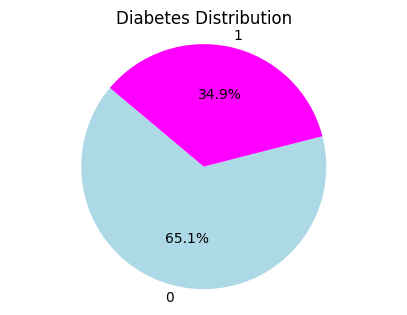

In [5]:
#explore diabetes outcomes
Outcome_counts = df['Outcome'].value_counts()

plt.figure(figsize=(5, 3.5))
plt.pie(Outcome_counts, labels=Outcome_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'magenta'])
plt.title('Diabetes Distribution')
plt.axis('equal')
plt.show()

Explore the relationship using corelation matrix

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

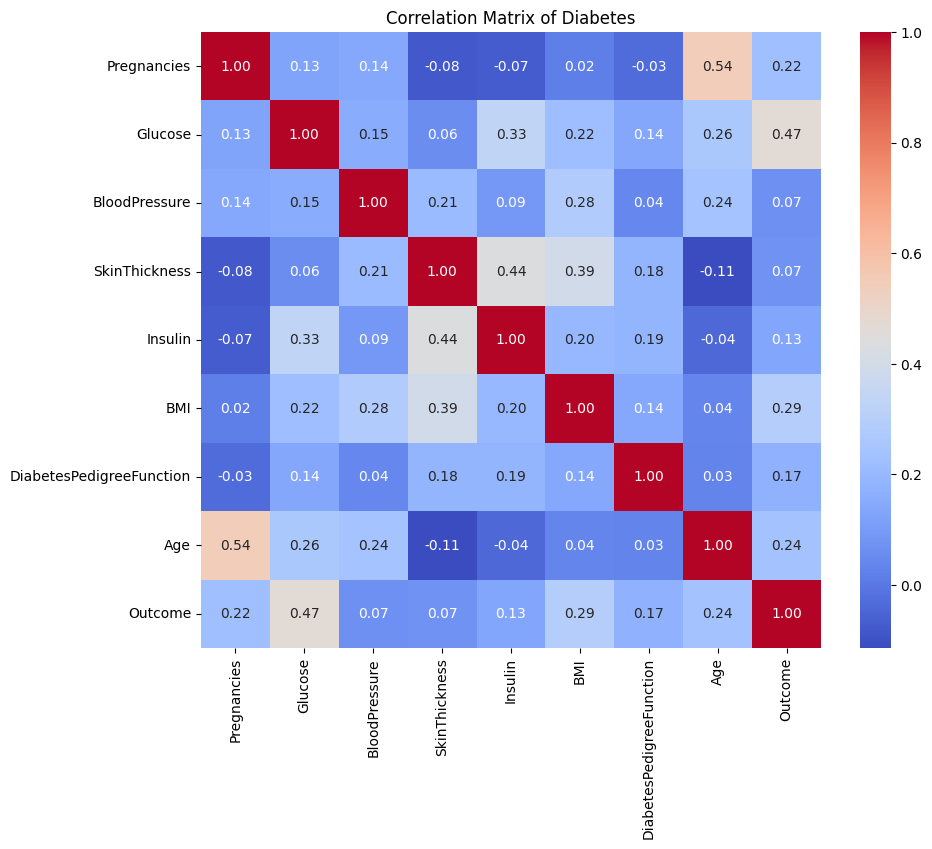

In [7]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Diabetes')
plt.show()


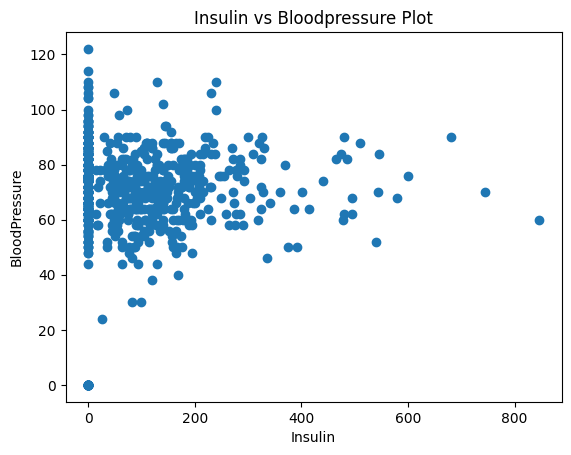

In [6]:
import matplotlib.pyplot as plt

# Drawing the Scatter Plot
plt.scatter(df["Insulin"], df["BloodPressure"])
plt.title('Insulin vs Bloodpressure Plot')
plt.xlabel('Insulin')
plt.ylabel('BloodPressure')
plt.show()


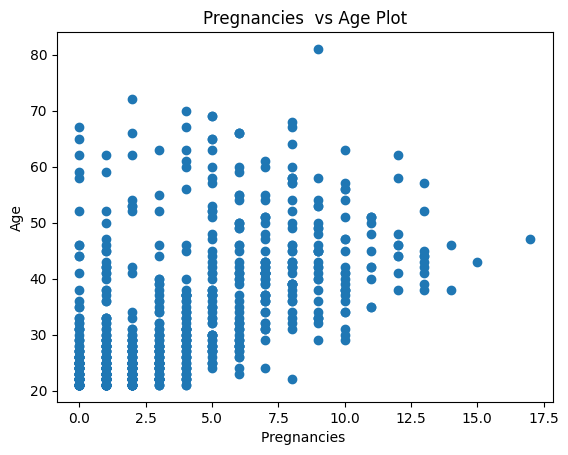

In [9]:
import matplotlib.pyplot as plt

# Drawing the Scatter Plot
plt.scatter(df["Pregnancies"], df["Age"])
plt.title('Pregnancies  vs Age Plot')
plt.xlabel('Pregnancies ')
plt.ylabel('Age')
plt.show()

Explore each columns : Univariate analysis
using Boxplot and Histogram

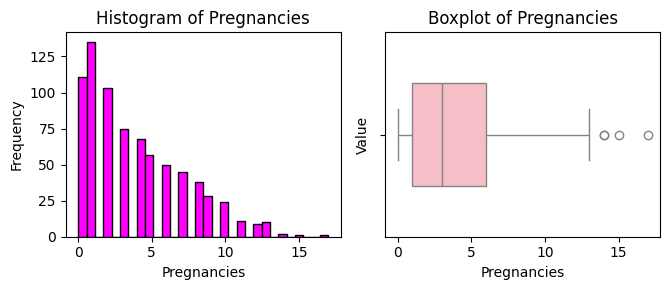

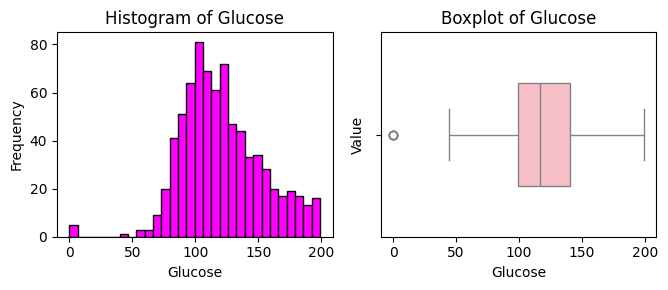

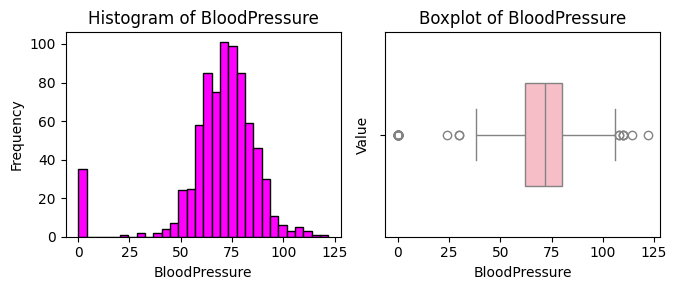

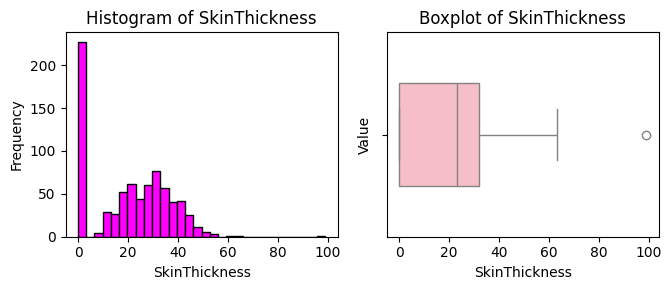

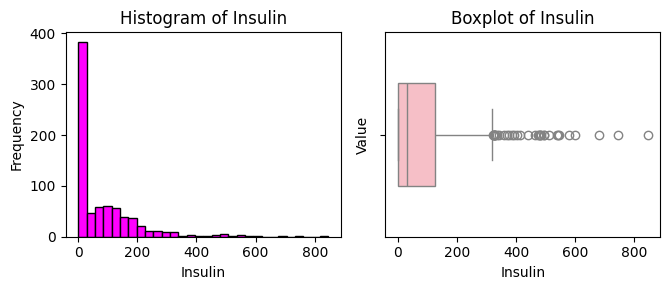

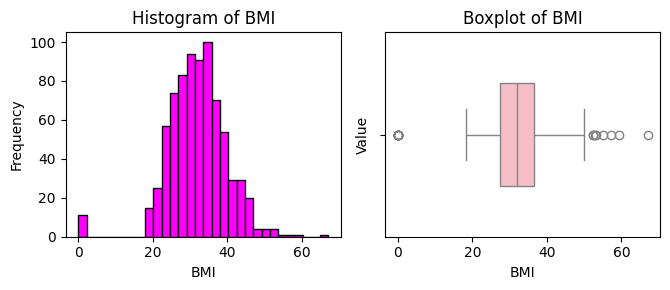

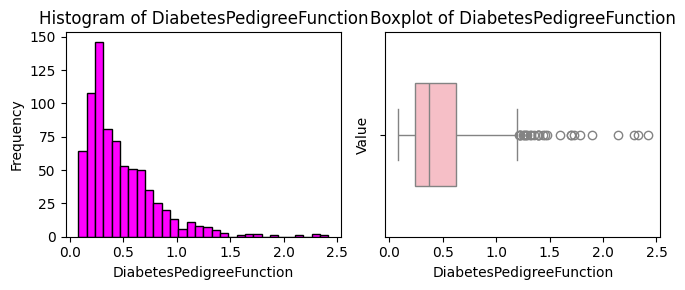

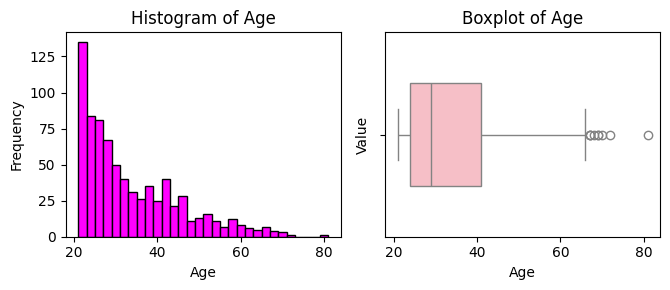

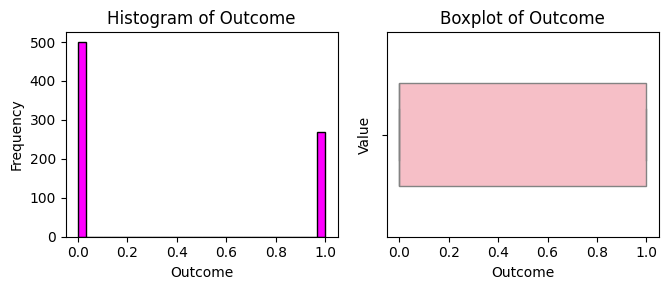

In [11]:
import numpy as np

#Histogram for Visualize the distribution of column values, Boxplot for see percentiles and detect outliers
num_cols = df.select_dtypes(include=np.number).columns
numerical_data = df[num_cols]
for col in numerical_data[1:]:
    plt.figure(figsize=(10, 3))

    # Histogram
    plt.subplot(1, 3, 1)
    df[col].plot.hist(bins=30, color='magenta', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=df[col],color='lightpink', width=0.5)
    plt.xlabel(col)
    plt.ylabel('Value')
    plt.title(f'Boxplot of {col}')


    plt.tight_layout()
    plt.show()


In [12]:
#Explore missing values and drop it if any
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [15]:
#explore relationship of age distribution and predictor
fig = px.histogram(df, x='Age', color='Outcome', barmode='group', nbins=20, title='Diabetes by Age')
fig.update_layout(xaxis_title='Age', yaxis_title='Count')
fig.show()

In [16]:
#explore relationship of Glucose distribution and predictor
fig = px.histogram(df, x='Glucose', color='Outcome', barmode='group', nbins=20, title='Diabetes by Glucose level')
fig.update_layout(xaxis_title='Clucose', yaxis_title='Count')
fig.show()

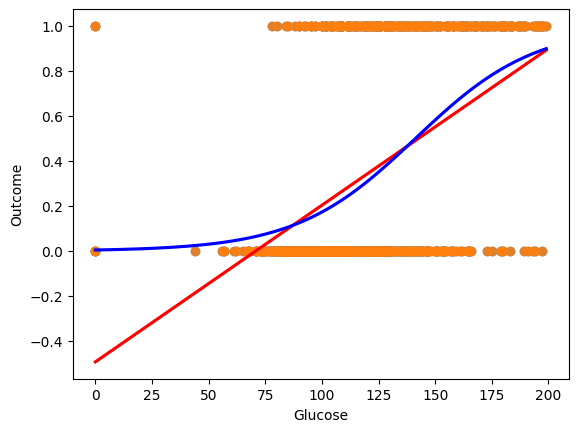

In [17]:
# Draw a linear regression trend line and a scatter plot
sns.regplot(x="Glucose",
            y="Outcome",
            data=df,
            ci=None,
            line_kws={"color": "red"})

# Draw a logistic regression trend line and a scatter plot
sns.regplot(x="Glucose",
            y="Outcome",
            data=df,
            ci=None,logistic= True,
            line_kws={"color": "blue"})

plt.show()

Using Logit from statsmodels.formula.api instead of OLS because of the outcome is binary classification and as you can see above the linear regression trend line doesnt really fit the value perfectly compare to logistic regression trend line

In [26]:
import statsmodels.api as sm
# Define the independent variables (X) and the dependent variable (y)
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

# Add a constant (intercept term) to the model
X = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print the summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.470993
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Sun, 20 Oct 2024   Pseudo R-squ.:                  0.2718
Time:                        05:06:58   Log-Likelihood:                -361.72
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 9.652e-54
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -8.4047      0.717    -11.728      0.000      -9.809

Perform Cross Validation to help better use of available data by ensuring all data points contribute to both training and testing and provides more reliable performance estimates, avoiding bias from a single train-test split.

In [30]:
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Define the independent variables (X) and the dependent variable (y)
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

# Add a constant (intercept term) to the model
X = sm.add_constant(X)

# Initialize KFold for cross-validation
kf = KFold(n_splits=5)  # 5 folds

# Store accuracy scores for each fold
accuracy_scores = []

# Perform cross-validation to help performs consistently on new,
#unseen data, which is the ultimate goal in machine learning and predictive modeling.
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the logistic regression model on the training data
    logit_model = sm.Logit(y_train, X_train)
    result = logit_model.fit()

    # Predict on the test data
    y_pred = result.predict(X_test)
    y_pred_class = (y_pred > 0.5).astype(int) # Convert probabilities to class labels

    # Calculate accuracy and append to the list
    accuracy_scores.append(accuracy_score(y_test, y_pred_class))

# Calculate and print the mean accuracy
print(f"Cross-validated accuracy: {np.mean(accuracy_scores)}")

Optimization terminated successfully.
         Current function value: 0.465892
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.458673
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.467666
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.487243
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.468244
         Iterations 6
Cross-validated accuracy: 0.7709107885578474


 Cross-validated accuracy: 0.7709, means that the logistic regression model, when evaluated using 5-fold cross-validation, correctly predicted whether someone has diabetes (based on the features) around 77.1% of the time on average.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Convert to DataFrame
df1 = pd.DataFrame(df)

# Define the independent variables (X) and the dependent variable (y)
X = df1[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df1['Outcome']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression()

# Fit the model
log_reg_model.fit(X_train, y_train)

# Predict the test data
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results 0 = no diabetes, 1 = diabetes).
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.7467532467532467
Confusion Matrix:
 [[78 21]
 [18 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Store the additional scores
precision_scores = []
recall_scores = []
f1_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    logit_model = sm.Logit(y_train, X_train)
    result = logit_model.fit()

    y_pred = result.predict(X_test)
    y_pred_class = (y_pred > 0.5).astype(int)

    # Append the scores for each fold
    precision_scores.append(precision_score(y_test, y_pred_class))
    recall_scores.append(recall_score(y_test, y_pred_class))
    f1_scores.append(f1_score(y_test, y_pred_class))

# Print mean of each score
print(f"Cross-validated precision: {np.mean(precision_scores)}")
print(f"Cross-validated recall: {np.mean(recall_scores)}")
print(f"Cross-validated F1-score: {np.mean(f1_scores)}")


Optimization terminated successfully.
         Current function value: 0.600677
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605559
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603456
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.617391
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.608136
         Iterations 5
Cross-validated precision: 0.5720517872220658
Cross-validated recall: 0.3464832621082621
Cross-validated F1-score: 0.4273851064805433
